In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib.axes import Axes 

cleaned_lines = [] 
with open('commands.csv', 'r') as file: 
    for line in file: 
        parts = line.strip().rsplit(maxsplit=1)
        if len(parts) == 2:
            cleaned_lines.append(parts)

train = pd.DataFrame(cleaned_lines, columns=['command', 'danger'])
print(train)
            

                                               command danger
0          cat /sys/bus/usb/devices/usb1/power/control     NO
1    cat /sys/bus/usb/devices/usb1/power/runtime_st...     NO
2    cat /sys/bus/usb/devices/usb2/power/runtime_st...     NO
3    cat /sys/bus/usb/devices/usb3/power/runtime_st...     NO
4    cat /sys/bus/usb/devices/usb4/power/runtime_st...     NO
..                                                 ...    ...
831                                     python3 +AC0-V    YES
832                           apt install python 3.7.4    YES
833                                      python +AC0-V     NO
834                                     python3 +AC0-V    YES
835                                        apt upgrade     NO

[836 rows x 2 columns]


In [2]:
train.head()

,command,danger
0,cat /sys/bus/usb/devices/usb1/power/control,NO
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,NO
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,NO
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,NO
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,NO


In [3]:
train.tail()

,command,danger
831,python3 +AC0-V,YES
832,apt install python 3.7.4,YES
833,python +AC0-V,NO
834,python3 +AC0-V,YES
835,apt upgrade,NO


In [4]:
# let's see the target distribution 
np.unique(train['danger'], return_counts=True)

(array(['NO', 'YES'], dtype=object), array([426, 410]))

In [5]:
# we can conclude it's balanced 

In [6]:
# number of words in the commands 
train['num_words'] = train['command'].apply(lambda x: len(str(x).split()))

In [7]:
np.unique(train['num_words'], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 12, 13]),
 array([160, 294, 265,  56,  23,   2,   9,  13,   7,   3,   4]))

(array([454., 265.,  56.,  23.,   2.,  22.,   7.,   0.,   0.,   7.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

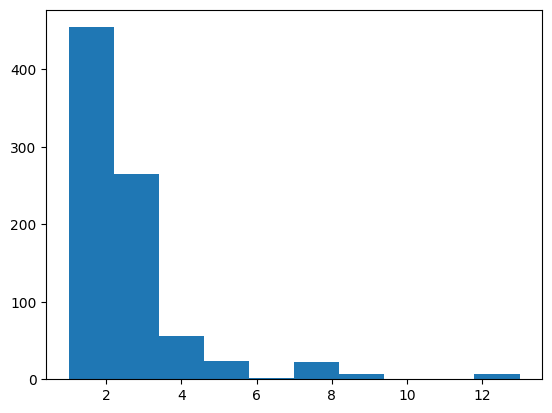

In [8]:
# let's see the probability distribution
plt.hist(train['num_words'])

(array([160.,   0., 294.,   0., 265.,  56.,  25.,   9.,  20.,   7.]),
 array([9.99500333e-04, 2.57402178e-01, 5.13804856e-01, 7.70207534e-01,
        1.02661021e+00, 1.28301289e+00, 1.53941557e+00, 1.79581824e+00,
        2.05222092e+00, 2.30862360e+00, 2.56502628e+00]),
 <BarContainer object of 10 artists>)

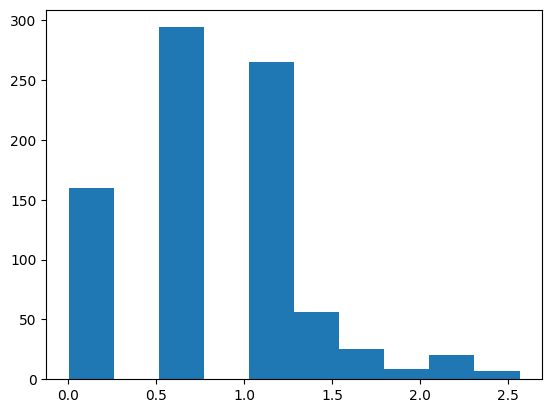

In [9]:
# so we have a Pareto distribution, it's usually better to apply log transformation to get a normal distribution 
plt.hist(np.log(train['num_words']+0.001))

In [10]:
#average og length of commands 
train['mean_word_len'] = train['command'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [11]:
train

,command,danger,num_words,mean_word_len
0,cat /sys/bus/usb/devices/usb1/power/control,NO,2,21.00
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,NO,2,24.50
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,NO,2,24.50
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,NO,2,24.50
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,NO,2,24.50
...,...,...,...,...
831,python3 +AC0-V,YES,2,6.50
832,apt install python 3.7.4,YES,4,5.25
833,python +AC0-V,NO,2,6.00
834,python3 +AC0-V,YES,2,6.50


In [12]:
train["num_unique_words"] = train['command'].apply(lambda x: len(set(str(x).split())))

In [13]:
train

,command,danger,num_words,mean_word_len,num_unique_words
0,cat /sys/bus/usb/devices/usb1/power/control,NO,2,21.00,2
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,NO,2,24.50,2
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,NO,2,24.50,2
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,NO,2,24.50,2
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,NO,2,24.50,2
...,...,...,...,...,...
831,python3 +AC0-V,YES,2,6.50,2
832,apt install python 3.7.4,YES,4,5.25,4
833,python +AC0-V,NO,2,6.00,2
834,python3 +AC0-V,YES,2,6.50,2


In [14]:
train['num_chars'] = train['command'].apply(lambda x: len(str(x)))

In [15]:
train

,command,danger,num_words,mean_word_len,num_unique_words,num_chars
0,cat /sys/bus/usb/devices/usb1/power/control,NO,2,21.00,2,43
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,NO,2,24.50,2,50
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,NO,2,24.50,2,50
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,NO,2,24.50,2,50
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,NO,2,24.50,2,50
...,...,...,...,...,...,...
831,python3 +AC0-V,YES,2,6.50,2,14
832,apt install python 3.7.4,YES,4,5.25,4,24
833,python +AC0-V,NO,2,6.00,2,13
834,python3 +AC0-V,YES,2,6.50,2,14


In [16]:
## Number of title case words in the text ##
train["num_words_upper"] = train["command"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

In [17]:
train

,command,danger,num_words,mean_word_len,num_unique_words,num_chars,num_words_upper
0,cat /sys/bus/usb/devices/usb1/power/control,NO,2,21.00,2,43,0
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,NO,2,24.50,2,50,0
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,NO,2,24.50,2,50,0
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,NO,2,24.50,2,50,0
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,NO,2,24.50,2,50,0
...,...,...,...,...,...,...,...
831,python3 +AC0-V,YES,2,6.50,2,14,1
832,apt install python 3.7.4,YES,4,5.25,4,24,0
833,python +AC0-V,NO,2,6.00,2,13,1
834,python3 +AC0-V,YES,2,6.50,2,14,1


In [18]:
import string
## Number of punctuations in the text ##
train["num_punctuations"] =train['command'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

In [19]:
train

,command,danger,num_words,mean_word_len,num_unique_words,num_chars,num_words_upper,num_punctuations
0,cat /sys/bus/usb/devices/usb1/power/control,NO,2,21.00,2,43,0,7
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,NO,2,24.50,2,50,0,8
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,NO,2,24.50,2,50,0,8
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,NO,2,24.50,2,50,0,8
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,NO,2,24.50,2,50,0,8
...,...,...,...,...,...,...,...,...
831,python3 +AC0-V,YES,2,6.50,2,14,1,2
832,apt install python 3.7.4,YES,4,5.25,4,24,0,2
833,python +AC0-V,NO,2,6.00,2,13,1,2
834,python3 +AC0-V,YES,2,6.50,2,14,1,2


In [20]:
entropy_words=[]
total_words=[]
unique_words=[]
total_voals=[]
unique_voals=[]
entropy_voals=[]
total_cons=[]
unique_cons=[]
entropy_cons=[]

for  row in range(train.shape[0]):
  
    #for  words
    sentence=train['command'][row]
    words=[w for  w in  sentence.split(" ")]
     
    prob=np.unique(words,return_counts=True)[1]/len(words)
    entropy=np.sum(prob**2)
    entropy_words.append(entropy)
    total_words.append(len(words))
    unique_words.append(len(set(words)))
    # vowels
    voals=[v   for  v in  sentence  if    v in  'aeiou']
    tot_voals=len(voals)
    uniq_voals=len(set(voals))
    prob=np.unique(voals,return_counts=True)[1]/len(voals)
    entropy=np.sum(prob**2)
    total_voals.append(tot_voals)
    unique_voals.append(uniq_voals)
    entropy_voals.append(entropy)
    #consoans
    cons=[v   for  v in  sentence  if    v not  in  'aeiou']
    tot_cons=len(cons)
    uniq_cons=len(set(cons))
    prob=np.unique(cons,return_counts=True)[1]/len(cons)
    entropy=np.sum(prob**2)
    total_cons.append(tot_cons)
    unique_cons.append(uniq_cons)
    entropy_cons.append(entropy)
    
    
    
    
    
train['entropy_words']    =np.log(np.array(entropy_words)+0.01)
train['total_words']   =np.array(total_words)
train['unique_word']   =np.array(unique_words)
train['total_voals']   =np.array(total_voals)
train['unique_voals']   =np.array(unique_voals)
train['entropy_voals']   =np.log(np.array(entropy_voals)+0.01)
train['total_cons']   =np.array(total_cons)
train['unique_cons']  =np.array(unique_cons)
train['entropy_cons']  =np.log(np.array(entropy_cons)+0.01)
    

In [21]:
train

,command,danger,num_words,mean_word_len,num_unique_words,num_chars,num_words_upper,num_punctuations,entropy_words,total_words,unique_word,total_voals,unique_voals,entropy_voals,total_cons,unique_cons,entropy_cons
0,cat /sys/bus/usb/devices/usb1/power/control,NO,2,21.00,2,43,0,7,-0.673345,2,2,11,5,-1.387618,32,15,-2.062093
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,NO,2,24.50,2,50,0,8,-0.673345,2,2,14,5,-1.327640,36,16,-2.037376
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,NO,2,24.50,2,50,0,8,-0.673345,2,2,14,5,-1.327640,36,16,-2.037376
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,NO,2,24.50,2,50,0,8,-0.673345,2,2,14,5,-1.327640,36,16,-2.037376
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,NO,2,24.50,2,50,0,8,-0.673345,2,2,14,5,-1.327640,36,16,-2.037376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,python3 +AC0-V,YES,2,6.50,2,14,1,2,-0.673345,2,2,1,1,0.009950,13,13,-2.442732
832,apt install python 3.7.4,YES,4,5.25,4,24,0,2,-1.347074,4,4,4,3,-0.954512,20,12,-2.207275
833,python +AC0-V,NO,2,6.00,2,13,1,2,-0.673345,2,2,1,1,0.009950,12,12,-2.371578
834,python3 +AC0-V,YES,2,6.50,2,14,1,2,-0.673345,2,2,1,1,0.009950,13,13,-2.442732


In [22]:
train.describe

<bound method NDFrame.describe of                                                command danger  num_words  \
0          cat /sys/bus/usb/devices/usb1/power/control     NO          2   
1    cat /sys/bus/usb/devices/usb1/power/runtime_st...     NO          2   
2    cat /sys/bus/usb/devices/usb2/power/runtime_st...     NO          2   
3    cat /sys/bus/usb/devices/usb3/power/runtime_st...     NO          2   
4    cat /sys/bus/usb/devices/usb4/power/runtime_st...     NO          2   
..                                                 ...    ...        ...   
831                                     python3 +AC0-V    YES          2   
832                           apt install python 3.7.4    YES          4   
833                                      python +AC0-V     NO          2   
834                                     python3 +AC0-V    YES          2   
835                                        apt upgrade     NO          2   

     mean_word_len  num_unique_words  num_chars  num_

In [23]:
train.shape

(836, 17)

In [24]:
train.describe(exclude=np.number)


,command,danger
count,836,836
unique,494,2
top,clear,NO
freq,52,426


In [25]:
# Convert 'danger' column to boolean 
train['danger'] = train['danger'].map({'YES': True, 'NO': False})
train['danger'].dtype

dtype('bool')

In [51]:
# Building xgboost matrix
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
y = train[['danger']]
X = train.drop('danger', axis=1)

In [52]:
X

,command,num_words,mean_word_len,num_unique_words,num_chars,num_words_upper,num_punctuations,entropy_words,total_words,unique_word,total_voals,unique_voals,entropy_voals,total_cons,unique_cons,entropy_cons
0,cat /sys/bus/usb/devices/usb1/power/control,2,21.00,2,43,0,7,-0.673345,2,2,11,5,-1.387618,32,15,-2.062093
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,2,24.50,2,50,0,8,-0.673345,2,2,14,5,-1.327640,36,16,-2.037376
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,2,24.50,2,50,0,8,-0.673345,2,2,14,5,-1.327640,36,16,-2.037376
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,2,24.50,2,50,0,8,-0.673345,2,2,14,5,-1.327640,36,16,-2.037376
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,2,24.50,2,50,0,8,-0.673345,2,2,14,5,-1.327640,36,16,-2.037376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,python3 +AC0-V,2,6.50,2,14,1,2,-0.673345,2,2,1,1,0.009950,13,13,-2.442732
832,apt install python 3.7.4,4,5.25,4,24,0,2,-1.347074,4,4,4,3,-0.954512,20,12,-2.207275
833,python +AC0-V,2,6.00,2,13,1,2,-0.673345,2,2,1,1,0.009950,12,12,-2.371578
834,python3 +AC0-V,2,6.50,2,14,1,2,-0.673345,2,2,1,1,0.009950,13,13,-2.442732


In [53]:
y

,danger
0,False
1,False
2,False
3,False
4,False
...,...
831,True
832,True
833,False
834,True


In [54]:
#X = X.drop('command', axis=1)
X

,command,num_words,mean_word_len,num_unique_words,num_chars,num_words_upper,num_punctuations,entropy_words,total_words,unique_word,total_voals,unique_voals,entropy_voals,total_cons,unique_cons,entropy_cons
0,cat /sys/bus/usb/devices/usb1/power/control,2,21.00,2,43,0,7,-0.673345,2,2,11,5,-1.387618,32,15,-2.062093
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,2,24.50,2,50,0,8,-0.673345,2,2,14,5,-1.327640,36,16,-2.037376
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,2,24.50,2,50,0,8,-0.673345,2,2,14,5,-1.327640,36,16,-2.037376
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,2,24.50,2,50,0,8,-0.673345,2,2,14,5,-1.327640,36,16,-2.037376
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,2,24.50,2,50,0,8,-0.673345,2,2,14,5,-1.327640,36,16,-2.037376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,python3 +AC0-V,2,6.50,2,14,1,2,-0.673345,2,2,1,1,0.009950,13,13,-2.442732
832,apt install python 3.7.4,4,5.25,4,24,0,2,-1.347074,4,4,4,3,-0.954512,20,12,-2.207275
833,python +AC0-V,2,6.00,2,13,1,2,-0.673345,2,2,1,1,0.009950,12,12,-2.371578
834,python3 +AC0-V,2,6.50,2,14,1,2,-0.673345,2,2,1,1,0.009950,13,13,-2.442732


In [55]:
#The dataset has three categorical columns. Normally, you would encode them with ordinal or one-hot encoding, but XGBoost has the ability to internally deal with categoricals.
#The way to enable this feature is to cast the categorical columns into Pandas category data type (by default, they are treated as text columns):
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')

In [56]:
X.dtypes

command             category
num_words              int64
mean_word_len        float64
num_unique_words       int64
num_chars              int64
num_words_upper        int64
num_punctuations       int64
entropy_words        float64
total_words            int64
unique_word            int64
total_voals            int64
unique_voals           int64
entropy_voals        float64
total_cons             int64
unique_cons            int64
entropy_cons         float64
dtype: object

In [57]:
y.dtypes

danger    bool
dtype: object

In [58]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [59]:
X_train 

,command,num_words,mean_word_len,num_unique_words,num_chars,num_words_upper,num_punctuations,entropy_words,total_words,unique_word,total_voals,unique_voals,entropy_voals,total_cons,unique_cons,entropy_cons
455,pip install tensorflow,3,6.666667,3,22,0,0,-1.069053,3,3,6,4,-1.245567,16,9,-2.002481
414,tcpdump +AC0-anlp 'port 80',4,6.000000,4,27,0,4,-1.347074,4,4,3,3,-1.069053,24,16,-2.371578
522,composer update,2,7.000000,2,15,0,0,-0.673345,2,2,6,4,-1.245567,9,8,-1.925503
529,php artisan serve,3,5.000000,3,17,0,0,-1.069053,3,3,5,3,-0.994252,12,8,-1.904555
619,chmod a+-x test+AF8-curl.sh,3,8.333333,3,27,0,5,-1.069053,3,3,4,4,-1.347074,23,16,-2.526438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ll,1,2.000000,1,2,0,0,0.009950,1,1,0,0,-4.605170,2,1,0.009950
767,ll,1,2.000000,1,2,0,0,0.009950,1,1,0,0,-4.605170,2,1,0.009950
72,history,1,7.000000,1,7,0,0,0.009950,1,1,2,2,-0.673345,5,5,-1.560648
235,apt search linux+AC0-kernel,3,8.333333,3,27,0,2,-1.069053,3,3,7,4,-1.151626,20,16,-2.525729


In [60]:
y_train

,danger
455,True
414,False
522,True
529,False
619,False
...,...
715,False
767,False
72,False
235,True


In [69]:
import xgboost as xgb 
model = xgb.XGBClassifier(
    max_leaves=0,
    verbosity=1, 
    booster='dart',
    enable_categorical=True, 
)
model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,'dart'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,True
,eval_metric,None


In [70]:
model.save_model('commands-predictor-model.json')

In [71]:
pred = model.predict(X_test)
pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [72]:
y_test

,danger
823,True
255,False
238,True
808,True
216,False
...,...
66,False
277,False
294,False
371,True


In [73]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred, y_test))

0.6985645933014354


<Figure size 1000x600 with 0 Axes>

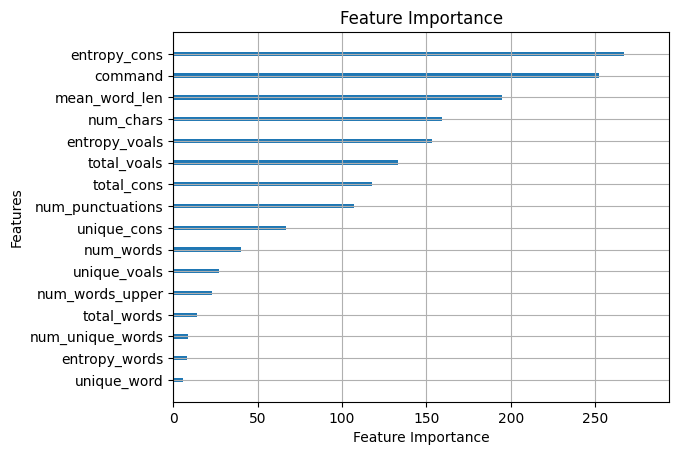

In [74]:
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='weight', xlabel='Feature Importance', show_values=False)
plt.title('Feature Importance')
plt.show()
